# Forest Fires

In [37]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
forest=pd.read_csv("forestfires.csv")

In [3]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
forest.shape

(517, 31)

In [7]:
Forest=pd.DataFrame(forest)

In [8]:
col = list(Forest.columns)[0:6]
Forest.drop(col, axis=1, inplace=True)

In [9]:
Forest.head()

,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,8.2,51,6.7,0.0,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,small
1,18.0,33,0.9,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,small
2,14.6,33,1.3,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,small
3,8.3,97,4.0,0.2,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,small
4,11.4,99,1.8,0.0,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,small


In [11]:
col = list(Forest.columns)[11:30]
Forest.drop(col, axis=1, inplace=True)

In [12]:
Forest.head()

,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue
0,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0
1,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1
2,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0
3,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0
4,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0


In [13]:
col = list(Forest.columns)[5:]
Forest.drop(col, axis=1, inplace=True)

In [14]:
Forest.head()

,temp,RH,wind,rain,area
0,8.2,51,6.7,0.0,0.0
1,18.0,33,0.9,0.0,0.0
2,14.6,33,1.3,0.0,0.0
3,8.3,97,4.0,0.2,0.0
4,11.4,99,1.8,0.0,0.0


In [15]:
row_indexes=Forest[Forest['area']>=5].index

In [16]:
Forest.loc[row_indexes,'Area']="large"

In [17]:
row_indexes=Forest[Forest['area']<5].index

In [18]:
Forest.loc[row_indexes,'Area']="small"

In [20]:
Forest.head()

,temp,RH,wind,rain,area,Area
0,8.2,51,6.7,0.0,0.0,small
1,18.0,33,0.9,0.0,0.0,small
2,14.6,33,1.3,0.0,0.0,small
3,8.3,97,4.0,0.2,0.0,small
4,11.4,99,1.8,0.0,0.0,small


In [21]:
Forest=Forest.drop("area",axis=1)

In [24]:
Forest.head()

,temp,RH,wind,rain,Area
0,8.2,51,6.7,0.0,small
1,18.0,33,0.9,0.0,small
2,14.6,33,1.3,0.0,small
3,8.3,97,4.0,0.2,small
4,11.4,99,1.8,0.0,small


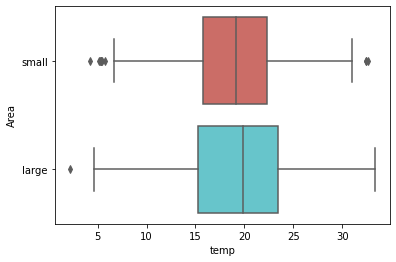

In [25]:
sns.boxplot(x="temp",y="Area",data=Forest,palette = "hls")

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [28]:
train,test = train_test_split(Forest,test_size = 0.3)
test.head()

,temp,RH,wind,rain,Area
361,17.3,45,4.0,0.0,small
160,16.1,29,3.1,0.0,small
180,23.9,32,6.7,0.0,large
259,23.7,40,1.8,0.0,small
151,24.8,29,2.2,0.0,small


In [29]:
train_X = train.iloc[:,0:4]
print(train_X)

     temp  RH  wind  rain
218  19.4  19   1.3   0.0
373  20.3  42   2.7   0.0
134  14.9  38   2.7   0.0
208  19.6  33   6.3   0.0
115  15.5  27   6.3   0.0
..    ...  ..   ...   ...
455  17.9  48   2.7   0.0
343  15.9  51   4.5   0.0
61    5.5  59   6.3   0.0
264  21.8  53   3.1   0.0
477  26.1  45   4.0   0.0

[361 rows x 4 columns]


In [30]:
train_y = train.iloc[:,4]
print(train_y)

218    large
373    small
134    small
208    large
115    small
       ...  
455    small
343    small
61     small
264    large
477    large
Name: Area, Length: 361, dtype: object


In [31]:
test_X  = test.iloc[:,0:4]
print(test_X)

     temp  RH  wind  rain
361  17.3  45   4.0   0.0
160  16.1  29   3.1   0.0
180  23.9  32   6.7   0.0
259  23.7  40   1.8   0.0
151  24.8  29   2.2   0.0
..    ...  ..   ...   ...
206  22.9  31   7.2   0.0
149  23.7  25   4.5   0.0
306  17.1  53   5.4   0.0
414  24.1  50   4.0   0.0
454  16.8  56   3.1   0.0

[156 rows x 4 columns]


In [32]:
test_y  = test.iloc[:,4]
print(test_y)

361    small
160    small
180    large
259    small
151    small
       ...  
206    large
149    small
306    small
414    small
454    small
Name: Area, Length: 156, dtype: object


In [33]:
model_linear = SVC(kernel = "linear")
model_linear.fit(train_X,train_y)
pred_test_linear = model_linear.predict(test_X)
np.mean(pred_test_linear==test_y)

0.7307692307692307

In [34]:
# Kernel = poly
model_poly = SVC(kernel = "poly",C=2)
model_poly.fit(train_X,train_y)
pred_test_poly = model_poly.predict(test_X)

np.mean(pred_test_poly==test_y) # Accuracy = 66.66

0.7307692307692307

In [35]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(train_X,train_y)
pred_test_rbf = model_rbf.predict(test_X)

np.mean(pred_test_rbf==test_y) # Accuracy = 65.38

0.7307692307692307

In [36]:
# kernel = sigmoid
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(train_X,train_y)
pred_test_sigmoid = model_sigmoid.predict(test_X)

np.mean(pred_test_sigmoid==test_y) # Accuracy = 66.02

0.6538461538461539

# SalaryData_Train  /  SalaryData_Test

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
SalaryData_test = pd.read_csv("SalaryData_Test(1).csv")
SalaryData_train = pd.read_csv("SalaryData_Train(1).csv")

In [42]:
SalaryData_test.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [43]:
SalaryData_train.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:

SalaryData_test['Salary'] = SalaryData_test['Salary'].map({' <=50K':1,' >50K':0})
SalaryData_train['Salary'] = SalaryData_train['Salary'].map({' <=50K':1,' >50K':0})
SalaryData_test.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,1
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,0
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,1
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,1
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,0
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,1


In [45]:
SalaryData_train.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,1
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,0
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,0
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,0


In [46]:
SalaryData_train =SalaryData_train.astype({'Salary':'category','race':'category','sex':'category'}) 
SalaryData_test =SalaryData_test.astype({'Salary': 'category'})
SalaryData_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            30161 non-null  int64   
 1   workclass      30161 non-null  object  
 2   education      30161 non-null  object  
 3   educationno    30161 non-null  int64   
 4   maritalstatus  30161 non-null  object  
 5   occupation     30161 non-null  object  
 6   relationship   30161 non-null  object  
 7   race           30161 non-null  category
 8   sex            30161 non-null  category
 9   capitalgain    30161 non-null  int64   
 10  capitalloss    30161 non-null  int64   
 11  hoursperweek   30161 non-null  int64   
 12  native         30161 non-null  object  
 13  Salary         30161 non-null  category
dtypes: category(3), int64(5), object(6)
memory usage: 2.6+ MB


In [47]:
SalaryData_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            15060 non-null  int64   
 1   workclass      15060 non-null  object  
 2   education      15060 non-null  object  
 3   educationno    15060 non-null  int64   
 4   maritalstatus  15060 non-null  object  
 5   occupation     15060 non-null  object  
 6   relationship   15060 non-null  object  
 7   race           15060 non-null  object  
 8   sex            15060 non-null  object  
 9   capitalgain    15060 non-null  int64   
 10  capitalloss    15060 non-null  int64   
 11  hoursperweek   15060 non-null  int64   
 12  native         15060 non-null  object  
 13  Salary         15060 non-null  category
dtypes: category(1), int64(5), object(8)
memory usage: 1.5+ MB


In [48]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [49]:
SalaryData_train = SalaryData_train.apply(LabelEncoder().fit_transform)
SalaryData_train.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,1
1,33,4,9,12,2,3,0,4,1,0,0,12,37,1
2,21,2,11,8,0,5,1,4,1,0,0,39,37,1
3,36,2,1,6,2,5,0,2,1,0,0,39,37,1
4,11,2,9,12,2,9,5,2,0,0,0,39,4,1
5,20,2,12,13,2,3,5,4,0,0,0,39,37,1
6,32,2,6,4,3,7,1,2,0,0,0,15,21,1
7,35,4,11,8,2,3,0,4,1,0,0,44,37,0
8,14,2,12,13,4,9,1,4,0,104,0,49,37,0
9,25,2,9,12,2,3,0,4,1,78,0,39,37,0


In [50]:
SalaryData_test = SalaryData_test.apply(LabelEncoder().fit_transform)
SalaryData_test.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,1
1,21,2,11,8,2,4,0,4,1,0,0,49,37,1
2,11,1,7,11,2,10,0,4,1,0,0,39,37,0
3,27,2,15,9,2,6,0,2,1,87,0,39,37,0
4,17,2,0,5,4,7,1,4,1,0,0,29,37,1
5,46,4,14,14,2,9,0,4,1,44,0,31,37,0
6,7,2,15,9,4,7,4,4,0,0,0,39,37,1
7,38,2,5,3,2,2,0,4,1,0,0,9,37,1
8,48,2,11,8,2,6,0,4,1,77,0,39,37,0
9,19,0,9,12,2,0,0,4,1,0,0,39,37,1


In [52]:
X = SalaryData_train.drop(['workclass','education','relationship','occupation','native','maritalstatus','sex','race'],axis=1)
Y = SalaryData_train['Salary']
print(np.unique(Y))
X.head(10)

[0 1]


,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,22,12,24,0,39,1
1,33,12,0,0,12,1
2,21,8,0,0,39,1
3,36,6,0,0,39,1
4,11,12,0,0,39,1
5,20,13,0,0,39,1
6,32,4,0,0,15,1
7,35,8,0,0,44,0
8,14,13,104,0,49,0
9,25,12,78,0,39,0


In [53]:
X = SalaryData_test.drop(['workclass','education','relationship','occupation','native','maritalstatus','sex','race'],axis=1)
Y = SalaryData_test['Salary']
print(np.unique(Y))
X.head(10)

[0 1]


,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,8,6,0,0,39,1
1,21,8,0,0,49,1
2,11,11,0,0,39,0
3,27,9,87,0,39,0
4,17,5,0,0,29,1
5,46,14,44,0,31,0
6,7,9,0,0,39,1
7,38,3,0,0,9,1
8,48,8,77,0,39,0
9,19,12,0,0,39,1


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [55]:
# Linear Support Vector Machine
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, Y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,Y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.9326029216467463


In [56]:
# Radical Support Vector Machine
from sklearn import svm #support vector Machine
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.9326029216467463


In [57]:
from sklearn import svm #support vector Machine
svc_radical =svm.SVC(kernel='sigmoid',C=1,gamma=0.22)
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
print('The accuracy of sigmoid SVC Model is', score_svc_radical)

The accuracy of sigmoid SVC Model is 0.7556440903054449


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [59]:
from sklearn.svm import SVC
svc = SVC(gamma=0.33)
svc.fit(X_train, Y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,Y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.9306108897742363


In [60]:
from sklearn import svm #support vector Machine
svc_radical =svm.SVC(kernel='poly',C=1,gamma=0.33)
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
print('The accuracy of poly SVC Model is', score_svc_radical)

The accuracy of poly SVC Model is 0.998339973439575
